In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog

import PIL
import cv2




In [ ]:
import platform
mysystem = platform.system()
# We need to first download the data here:
file_download_link = "https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/zipball/master"
# Check for windows

if mysystem != 'Windows':
    !wget -O dataset.zip --no-check-certificate "$file_download_link"
    !unzip dataset.zip

print('Please download the data using the following link:', file_download_link)

--2022-12-08 06:30:43--  https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/zipball/master
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/legacy.zip/refs/heads/master [following]
--2022-12-08 06:30:43--  https://codeload.github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/legacy.zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dataset.zip’

dataset.zip             [     <=>            ] 224.54M  18.2MB/s    in 13s     

2022-12-08 06:30:57 (17.8 MB/s) - ‘dataset.zip’ saved [235450096]

Archive:  dataset.zip
1f200541d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
# Load data from csv
potholes = pd.read_csv('pothole_data.csv')
indic = potholes["pothole"]
potholes.iloc[20:40]

,img,img_path,width,height,pothole,x_center,y_center,box_w,box_h
20,[[[ 3. 4. 0.]\n [ 3. 4. 0.]\n [ 3...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,1,369,300,18,21
21,[[[ 84. 97. 41.]\n [ 82. 96. 37.]\n [ 80...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
22,[[[ 14. 21. 3.]\n [ 19. 26. 8.]\n [ 24...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,1,40,292,354,229
23,[[[ 42. 48. 34.]\n [ 21. 27. 13.]\n [ 1...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
24,[[[ 22. 28. 18.]\n [ 18. 24. 14.]\n [ 13...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
25,[[[ 16. 19. 10.]\n [ 53. 56. 47.]\n [ 42...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
26,[[[ 10. 13. 2.]\n [ 11. 14. 3.]\n [ 14...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
27,[[[ 4. 7. 0.]\n [ 2. 5. 0.]\n [ 1...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
28,[[[ 7. 32. 2.]\n [ 31. 56. 26.]\n [ 24...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,0,0,0,0,0
29,[[[ 10. 13. 4.]\n [ 5. 8. 0.]\n [ 2...,biankatpas Cracks-and-Potholes-in-Road-Images-...,1024,640,1,516,468,83,36


In [8]:
imagepaths = list(potholes['img_path'])
#print(imagepaths)

for i,image in enumerate(imagepaths):
  temp = image
  temp = temp.replace(' master ','-1f20054/',1)
  temp = temp.replace(' ', '-',1)
  imagepaths[i] = temp
#print(imagepaths)
  
labelpaths = list(potholes['pothole'])
#print(labelpaths)
#print(len(labelpaths))

['biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1007599_RS_386_386RS289112_28920/1007599_RS_386_386RS289112_28920_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1007600_RS_386_386RS289112_28925/1007600_RS_386_386RS289112_28925_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1007607_RS_386_386RS289112_28960/1007607_RS_386_386RS289112_28960_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1007608_RS_386_386RS289112_28966/1007608_RS_386_386RS289112_28966_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1008367_RS_386_386RS289112_32760/1008367_RS_386_386RS289112_32760_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1008560_RS_386_386RS289112_33725/1008560_RS_386_386RS289112_33725_RAW.jpg', 'biankatpas Cracks-and-Potholes-in-Road-Images-Dataset master Dataset/1014583_RS_386_386RS124739_29840/1014583_RS_386_386RS

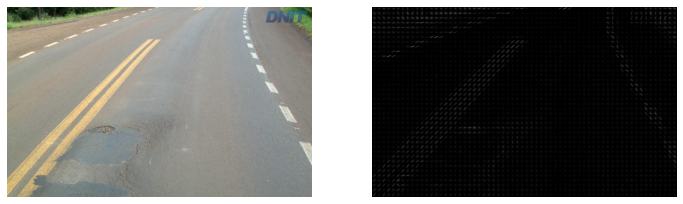

In [64]:
exampleimage = np.asarray(PIL.Image.open(imagepaths[4]))
featuresvis, visualized = hog(exampleimage,orientations=500,
                           pixels_per_cell=(16,16),cells_per_block=(2,2),visualize=True,multichannel=True)


fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(exampleimage)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(visualized,cmap="gray")
plt.axis("off")
plt.show()


def getNegs(img):
  newimage = img.point(lambda p: 255-p)
  return newimage





In [46]:
positiveimages = []
negativeimages = []
positivelabels = []
negativelabels = []
#positivegrey = []
for i,path in enumerate(imagepaths):
  img = PIL.Image.open(path)
  img = getNegs(img)
  img = np.asarray(img)
  img = cv2.cvtColor(cv2.resize(img, (96,64)),cv2.COLOR_RGB2GRAY)
 # if labelpaths[i] == 1:
   # positivegrey.append(img)
  img = hog(img,orientations=100,
                              pixels_per_cell=(16,16),cells_per_block=(2,2))
  if labelpaths[i] == 1:
    positiveimages.append(img)
    positivelabels.append(1)
  else:
    negativeimages.append(img)
    negativelabels.append(0)

print(len(positiveimages))
print(len(positivelabels))



564
564


In [49]:
      
#exampleimage = cv2.cvtColor(cv2.resize(img, (96,64)),cv2.COLOR_RGB2GRAY)

#print(exampleimage.shape)

x = np.asarray(positiveimages + negativeimages, dtype=int)
y = np.asarray(positivelabels + negativelabels, dtype=int)
print(len(x))
print(x[0].shape)

print(positiveimages[0].shape)
print(np.asarray(PIL.Image.open(imagepaths[0])).shape)
#print(positivegrey[0].shape)
print(len(y))

2235
(6000,)
(6000,)
(640, 1024, 3)
2235


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1788, 6000)
(447, 6000)
(1788,)
(447,)


In [51]:
svc = SVC()


svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=y_test)*100)

Accuracy score of model is  70.46979865771812


In [52]:
def slideExtract(image,windowSize=(96,64),channel="RGB",step=12):
    
    if channel == "RGB":
        img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    elif channel == "BGR":
        img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    elif channel.lower()!="grayscale" or channel.lower()!="gray":
        raise Exception("Invalid channel type")
    
    
    coordinates = []
    features = []
    
    hIm,wIm = image.shape[:2] 

    
    # W1 = Window 1
    # W2 = Window 2
    #These 2 windows will stride through the image in a similar fashion to kerneles and sliding windows used in feature extraction
    for width1,width2 in zip(range(0,wIm-windowSize[0],step),range(windowSize[0],wIm,step)):
       
        for height1,height2 in zip(range(0,hIm-windowSize[1],step),range(windowSize[1],hIm,step)):
            window = img[height1:height2,width1:width2]
            features_of_window = hog(window,orientations=100,pixels_per_cell=(16,16),
                                     cells_per_block=(2,2)
                                    )
            
            coordinates.append((width1,width2,height1,height2))
            features.append(features_of_window)
    
    return (coordinates,np.asarray(features))

In [53]:
example_image = np.asarray(PIL.Image.open(imagepaths[4]))
coordinates, features = slideExtract(example_image,channel="RGB")

coordinates[:5]



[(0, 96, 0, 64),
 (0, 96, 12, 76),
 (0, 96, 24, 88),
 (0, 96, 36, 100),
 (0, 96, 48, 112)]

In [54]:
from sklearn.preprocessing import MinMaxScaler

class Heatmap():
    
    def __init__(self,original_image):
        
        # This creates a heatmap full of zeroes
        self.mask = np.zeros(original_image.shape[:2])
    

    # If the region function yields an increased value we add more heat to the heatmap
    def incValOfReg(self,coordinates):
        width1,width2,height1,height2 = coordinates
        self.mask[height1:height2,width1:width2] = self.mask[height1:height2,width1:width2] + 30
    
    # If the region function yields an decreased value we add remove heat from heatmap
    def decValOfReg(self,coordinates):
        width1,width2,height1,height2 = coordinates
        self.mask[height1:height2,width1:width2] = self.mask[height1:height2,width1:width2] - 30
    
    def compileHeatmap(self):
  
        scaler = MinMaxScaler()
        
        self.mask = scaler.fit_transform(self.mask)
        
        
        # Preprocessing: Scaling
        self.mask = np.asarray(self.mask * 255).astype(np.uint8)
        
       
        #The threshold value determines the decision to make our mask white or make it black
        self.mask = cv2.inRange(self.mask,170,255)
        
        return self.mask

In [58]:
def detect(image,neg):
    
    # We create and extract the features in order to build the heatmap
    coordinates,features = slideExtract(neg)
    htmp = Heatmap(image)
    
    
    for i in range(len(features)):
        # a positive region may indicate a pothole, therefore we add some heat (color) to indicate its potential as a pothole
        decision = svc.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coordinates[i])
            # Negative regions will also allow us to remove heat 
        else:
            htmp.decValOfReg(coordinates[i])
    
    # This compiles the heatmap
    mask = htmp.compileHeatmap()
    
    contour,_ = cv2.findContours(mask,1,2)[:2]
    for c in contour:
        # remove unecessary contours
        if cv2.contourArea(c) < 70*70:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)
    
    return image

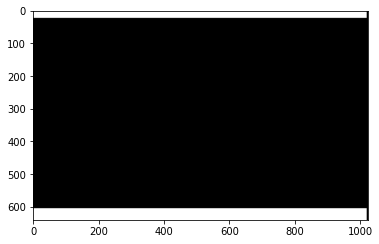

In [59]:
img = np.asarray(PIL.Image.open(imagepaths[4]))
img2 = PIL.Image.open(imagepaths[4])
neg = np.asarray(getNegs(img2))
coordinates,features = slideExtract(neg)
htmp = Heatmap(img)
    
    
for i in range(len(features)):
    # a positive region may indicate a pothole, therefore we add some heat (color) to indicate its potential as a pothole
    decision = svc.predict([features[i]])
    if decision[0] == 1:
      htmp.incValOfReg(coordinates[i])
    # Negative regions will also allow us to remo 
    else:
      htmp.decValOfReg(coordinates[i])
    
    # This compiles the heatmap
mask = htmp.compileHeatmap()
plt.imshow(mask, cmap="gray")
plt.show()

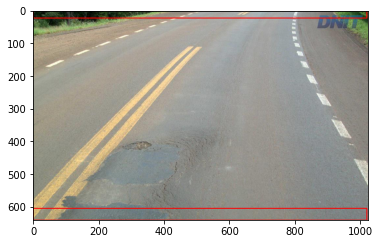

In [61]:
img = np.asarray(PIL.Image.open(imagepaths[4]))
#img = np.asarray(cv2.resize(img,(96,64)))
detected = detect(img, neg)
plt.imshow(detected)

References: 
Support Vector Machine Object Detection by Mehmet Tekman

Link: https://www.kaggle.com/code/mehmetlaudatekman/support-vector-machine-object-detection/notebook

